# 1. Manipulate data as necessary & create a scatter plot using matplotlib

In [16]:
import csv
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


In [17]:
def read_csv():
    """
    read csv file that contains all the data and draw a scatter plot with green for data that has y as 1 an red for data that has y as 0,
    @param csv_file: data file in form of csv format
    @return dict_val: dictionary value in form of {1: [[x value], [y-value]], 0: [[x value], [y-value]]}
    """
    dict_val = {'label': [], 'x_val': [], 'y_val': []}
    with open(r'C:\Users\Leaksmy Heng\Documents\GitHub\cs6140\HW2\hw2_data.txt') as file:
        for row in file.readlines():
            row = row.split(',')
            label = int(row[2][0])
            x_val = float(row[0])
            y_val = float(row[1])
            
            dict_val['label'].append(label)
            dict_val['x_val'].append(x_val)
            dict_val['y_val'].append(y_val)
        
        return dict_val
    

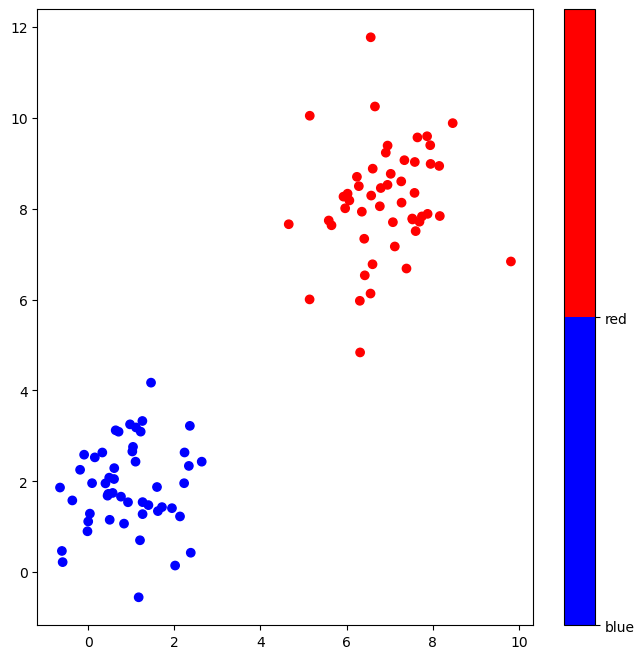

In [18]:
def draw_scatter_plot(dict_value):
    """
    Draw scatter plot using matplotlib.
    @param: dict_value containing x_array, y_array and label
    """
    dict_label = dict_value['label']
    dict_x = dict_value['x_val']
    dict_y = dict_value['y_val']
    colors = ['blue','red']
    
    fig = plt.figure(figsize=(8,8))
    plt.scatter(dict_x, dict_y, c=dict_label, cmap=matplotlib.colors.ListedColormap(colors))

    cb = plt.colorbar()
    loc = np.arange(0,max(dict_label),max(dict_label)/float(len(colors)))
    cb.set_ticks(loc)
    cb.set_ticklabels(colors)


draw_scatter_plot(read_csv())

# 2. Use the following class definition as skeleton of your code.

In [19]:
from math import pi, log, e

class GDA():
    def __init__(self):
        """
        Constructor for GDA:
        @param pi: prior probability of the positive class
        @mu0: mean of the negative class
        @mu1: mean of the positive class
        @sigma: covariance matrix
        """
        self.pi = None
        self.mu0 = None
        self.mu1 = None
        self.sigma = None

    def train(self, x, y):
        """
        estimate GDA parameters
        @param x: input value. Shown as [[x1, y1], [x2, y2], ...[xn, yn]]
        @type x: list of list
        @param y: label data. Show as [y1, y2, y3, ... yn]
        @type y: list
        """
        
        # sum of positive value or when y = 1
        n = len(y)
        
        # sum of negative value or when y = 0
        n0 = sum(1 for i in range(n) if y[i] == 0)
        
        # diff between positive and negative value
        n1 = n - n0
        
        #pior probability of the positive class and its mean of positive and negative class
        self.pi = n0 / n
        self.mu0 = [0] * len(x[0])
        self.mu1 = [0] * len(x[0])
        for i in range(n):
            if y[i] == 0:
                for j in range(len(x[0])):
                    self.mu0[j] += x[i][j] / n0
            else:
                for j in range(len(x[0])):
                    self.mu1[j] += x[i][j] / n1
        
        # find its shared covariance
        self.sigma = [[0] * len(x[0]) for _ in range(len(x[0]))]
        for i in range(n):
            if y[i] == 0:
                for j in range(len(x[0])):
                    for k in range(len(x[0])):
                        self.sigma[j][k] += (x[i][j] - self.mu0[j]) * (x[i][k] - self.mu0[k])
            else:
                for j in range(len(x[0])):
                    for k in range(len(x[0])):
                        self.sigma[j][k] += (x[i][j] - self.mu1[j]) * (x[i][k] - self.mu1[k])
        for j in range(len(x[0])):
            for k in range(len(x[0])):
                self.sigma[j][k] /= n

    def predict(self, x):
        """
        returns predictions vector.
        @param x: input value
        """
        p0 = self.pi * self.gaussian(x, self.mu0, self.sigma)
        p1 = (1 - self.pi) * self.gaussian(x, self.mu1, self.sigma)
        
        if p0 > p1:
            return 0
        return 1

    def gaussian(self, x, mu, sigma):
        """
        Helper function used in predict. This is a gaussian method. 
        """
        det = sigma[0][0] * sigma[1][1] - sigma[0][1] * sigma[1][0]
        inv = [[sigma[1][1] / det, -sigma[0][1] / det], [-sigma[1][0] / det, sigma[0][0] / det]]
        diff = [x[i] - mu[i] for i in range(len(x))]
        exponent = -0.5 * (diff[0] * (diff[0] * inv[0][0] + diff[1] * inv[1][0]) + diff[1] * (diff[0] * inv[0][1] + diff[1] * inv[1][1]))
        return 1 / (2 * pi * (det ** 0.5)) * e ** exponent


# Write a function to draw the decision boundary and contours of each class along

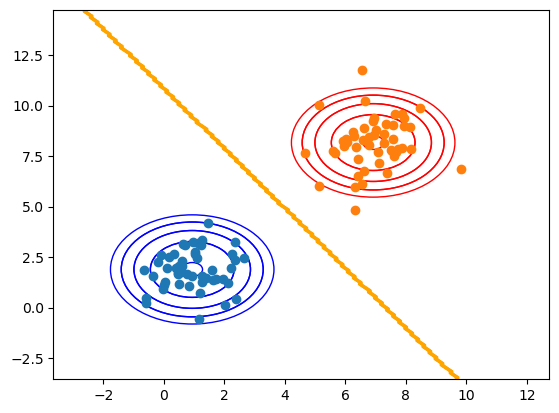

In [20]:
import logging
import matplotlib.pyplot as plt
import numpy as np

logging.basicConfig(filename='plot_decision_boundary.log',
                    level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')


def plot_decision_boundary(model, x, y):
    """
    Creating a dicision boundary based on the model provided its x and y.
    :param model: GDA model
    :param x: the input value with the value of [[x1, y1], [x2, y2], [x3, y3], ..., [xn, yn]]
    :type x: list of list
    :param y: label based of the input value. y is in {1, 0}. y is shown as [y1, y2, y3, ... yn)
    :return: list
    """
    # Find the min value for x and y
    # -3 & +3 so that our plot is wider
    x_min = min([point[0] for point in x]) - 3
    y_min = min([point[1] for point in x]) - 3

    # Find the max value for x and y coordinate
    x_max = max([point[0] for point in x]) + 3
    y_max = max([point[1] for point in x]) + 3

    # create a meshgrid based of our x_min, y_min, x_max, y_max with with 0.1 step (element spacing)
    # this will return the coordinate matrices from coordinate vectors.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    logging.info(f'x_min is {x_min}\nx_max is {x_max}\ny_min is {y_min}\ny_max is {y_max}')

    # use zip function to get a tuple of (x_grid, y_grid)
    zip_x_y = zip(xx.ravel(), yy.ravel())
    class_prediction = []
    for x_grid, y_grid in zip_x_y:
        class_prediction.append([model.predict([x_grid, y_grid])])
    # calculate the class prediction for each point in the meshgrid
    class_prediction = np.array(class_prediction)
    class_prediction = class_prediction.reshape(xx.shape)

    # Plot the decision boundary and circular contour
    plt.contour(xx, yy, class_prediction, colors='orange')
    mu0, mu1 = model.mu0, model.mu1
    sigma = model.sigma
    # compute eigen value
    w, v = np.linalg.eig(sigma)
    k = 2.4477  # value for 99% confidence interval for a 2-dimensional distribution

    max_eigan_val = w[1]
    logging.info(f'Eigan value is {w}')

    # plotting the contour
    while True:
        # substract with 0.3 so that we get lots of contour line
        sub_eigan_val = max_eigan_val - 0.3
        if sub_eigan_val < 0:
            break

        ellipse1 = plt.Circle((mu0[0], mu0[1]), k * np.sqrt(max_eigan_val), fill=False, color='blue')
        ellipse2 = plt.Circle((mu0[0], mu0[1]), k * np.sqrt(sub_eigan_val), fill=False, color='blue')
        plt.gca().add_artist(ellipse1)
        plt.gca().add_artist(ellipse2)
        ellipse1 = plt.Circle((mu1[0], mu1[1]), k * np.sqrt(max_eigan_val), fill=False, color='red')
        ellipse2 = plt.Circle((mu1[0], mu1[1]), k * np.sqrt(sub_eigan_val), fill=False, color='red')
        plt.gca().add_artist(ellipse1)
        plt.gca().add_artist(ellipse2)
        max_eigan_val = sub_eigan_val

    # plotting the data points
    plt.scatter([point[0] for point in x if y[x.index(point)] == 0],
                [point[1] for point in x if y[x.index(point)] == 0],
                )
    plt.scatter([point[0] for point in x if y[x.index(point)] == 1],
                [point[1] for point in x if y[x.index(point)] == 1],
                )

    plt.show()


# Testing out our data
dict_value = read_csv()
dict_label = dict_value['label']
dict_x = dict_value['x_val']
dict_y = dict_value['y_val']
x = []
for i in range(len(dict_x)):
    x.append([dict_x[i], dict_y[i]])


# Train GDA model
model = GDA()
model.train(x, dict_label)

# Plot the decision boundary and contour of our dataset
plot_decision_boundary(model, x, dict_label)
plt.show()


# Explain the difference between gaussian discriminant analysis and logistic regression as a classifier?

Gaussian Discriminant Analysis is a generative learning algorithm. It tries to capture the distribution of each classes seperately. GDA assumes that the input features follow a multivariate normal distribution. GDA uses Bayes' rule to compute the posterior probability of each class given the input feature. It then assigns the class with the highest probability. GDA allows for modeling the covariance matrix for each class separately.

Logistic regression is a discriminative learning algorithm. It tries to find a decision boundary between different classes rather than learning each class seperately like GDA. Logistic regression does not assume about the distribution of the input features. It models the relationship between the input features and the class probability using a logistic function, which maps the input features to the range {0, 1}. LR estimates the parameters of the logistic function using maximum likelihood estimation.